# ****Datasets and DataLoaders****
- PyTorch provides two data primitives : 
    - `torch.utils.data.Dataset` : `Dataset` stores the samples and their corresponding labels
    - `torch.utils.data.DataLoader` : `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples
- PyTorch domain libraries provide a number of pre-loaded datasets that subclass `torch.utils.data.Dataset` and implement functions specific to the particular data.

In [1]:
!pip install torch
!pip install torchvision
!pip install matplotlib
!pip install pandas

# **Loading a Dataset**
    - We load the dataset with the following parameters : 
        - `root` : root is the path where the train/test data is stored.
        - `train` : train specifies training or test dataset.
        - `download=True` : Downloads the data from the internet if it's not available at root.
        - `transform` and `target_transform` : specify the feature and label transformations.

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# load train data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,   # true for train data only
    download=True,
    transform=ToTensor()
)

# load test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,  # false for test data
    download=True,
    transform=ToTensor()
)

print("Data Loaded...!")


100%|██████████| 26421880/26421880 [00:01<00:00, 18569026.24it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305479.32it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5516901.30it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14932418.39it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Data Loaded...!


# **Iterating and Visualizing the Dataset**
- We can index `Datasets` manually like a list: `train_data[index]`. We use `matplotlib` to visualize some samples in our train_data.

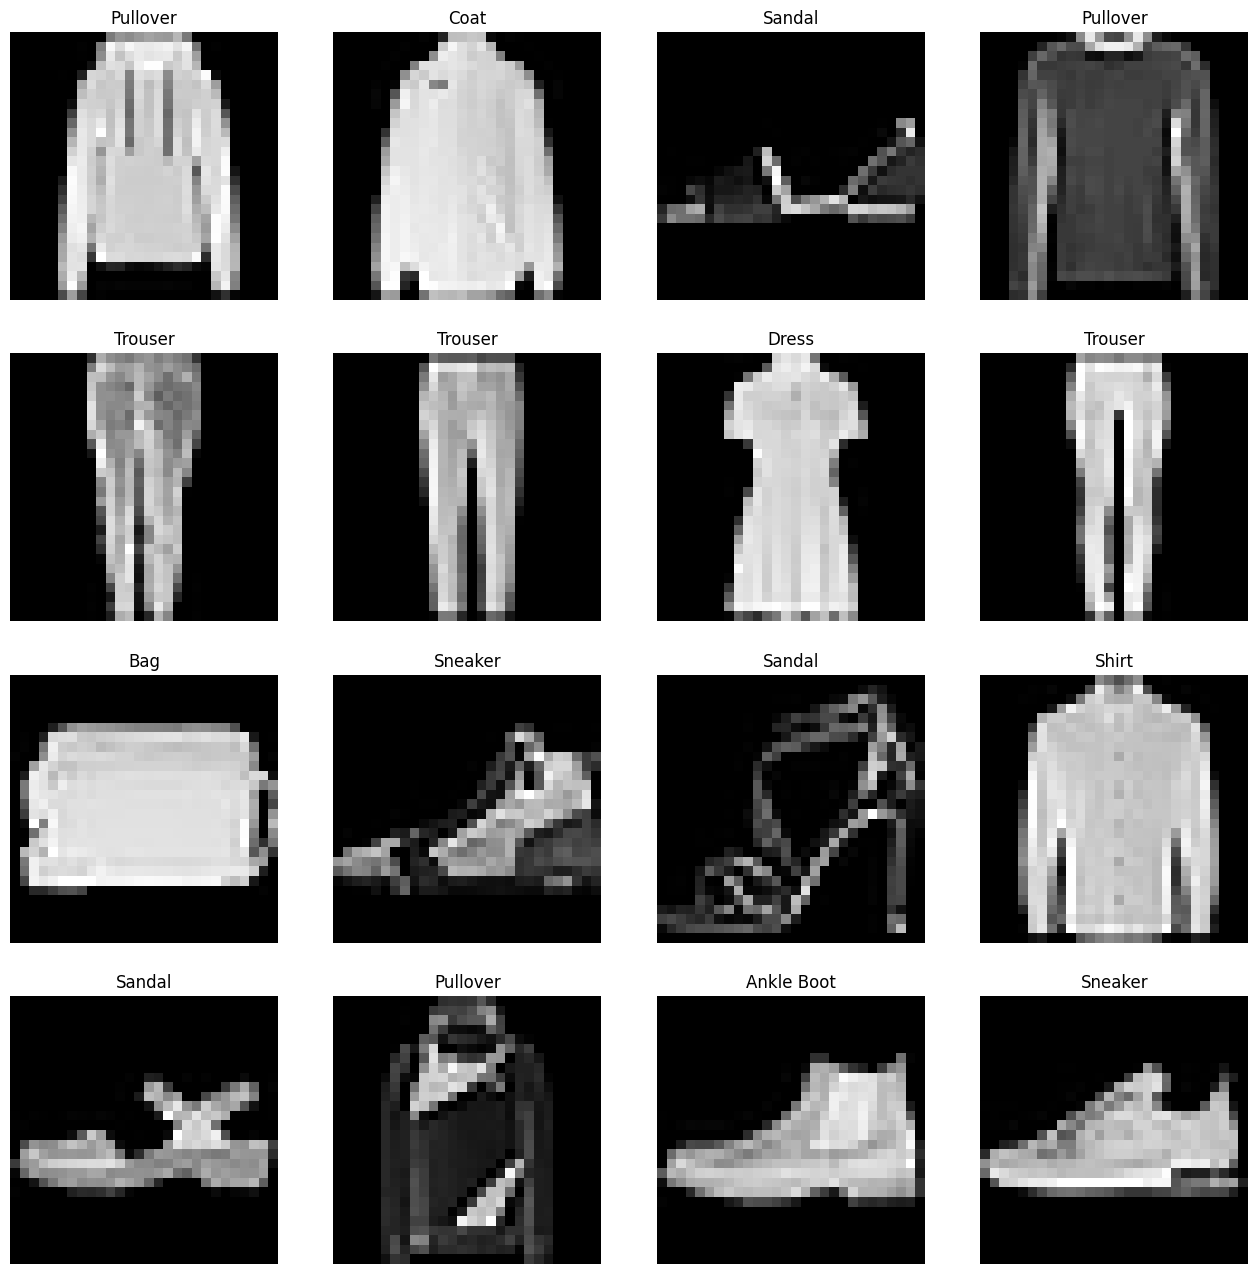

In [3]:
label_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(16, 16))
cols, rows = 4, 4
for i in range(1, cols * rows + 1) : 
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


# **Creating Custom Dataset for Your Files**
- A custom Dataset class must implement three functions : ***`__init__`***, ***`__len__`***, and ***`__getitem__`***. Images are stored into a directory **`img_dir`**, and their labels are stored separately in a csv file **`annotations_file`**.

In [4]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])  # get the image path
        image = read_image(img_path) # read the images
        label = self.img_labels.iloc[idx, 1]  # read the labels
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

    

## **Preparing your data for training with DataLoaders**
- The `Dataset` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to pass samples in `minibatches`, reshuffle the data at every epoch to reduce model overfitting, and use Python's `multiprocessing` to speed data retrieval.
- `DataLoader` is an iterable that abstracts this complexity for us in an easy API.
- PyTorch data loading utility is the `torch.utils.data.DataLoader` class. It represents a Python iterable over a dataset, with support for
    - map-style and iterable-style datasets
    - customizing data loading order
    - automatic batching
    - single-and multi-process data loading
    - automatic memory pinning.

`DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None, *, prefetch_factor=2,
           persistent_workers=False)`


In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)



## **Iterate through the DataLoader**
- We have loaded that dataset into the `DataLoader` and can iterate through the dataset as needed. Each iteration below returns a batch of `train_features` and `train_labels` (containing `batch_size=64` fetures and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled.

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])


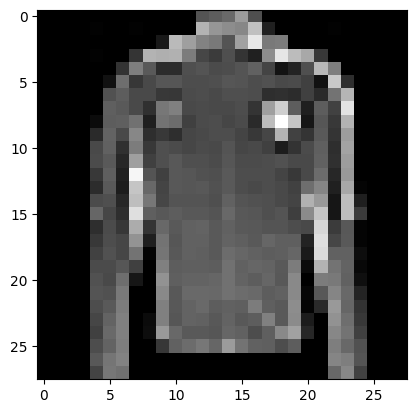

Label: 4


In [6]:
# display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape : {train_features.size()}")
print(f"Labels batch shape : {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
